# Runs a PCA analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
# Read in data
data = pd.read_csv('../data/features/merged.csv')

In [7]:
# TODO: UNDO
data = data[data['YEAR'] == 2018]

In [8]:
# We don't want to use beat and year as features
data.drop(['BEAT','YEAR'], axis=1, inplace=True)
# We also don't want district or sector
data.drop(['ISR_DISTRICT','ISR_SECTOR', 'UOF_DISTRICT'], axis=1, inplace=True)

In [9]:
# Normalize columns
# This puts all features at same importance. We may want type or shootings to be more important somehow.
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [10]:
# Do PCA
pca = PCA()
pca.fit(data_scaled)

PCA()

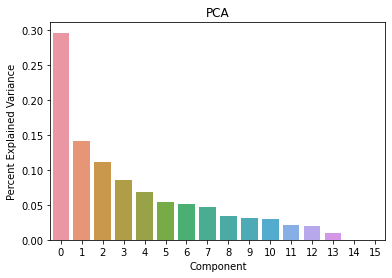

In [11]:
plt = sns.barplot(x=np.arange(data.shape[1]),y=pca.explained_variance_ratio_)
plt.set(title="PCA", xlabel="Component", ylabel="Percent Explained Variance");

In [12]:
pca_df = pd.DataFrame({"evr":pca.explained_variance_ratio_,
                      "component": np.arange(1, pca.n_components_+1)}) \
            .assign(cum_evr = lambda x: x.evr.cumsum())

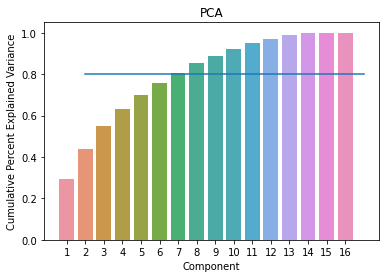

In [13]:
plt = sns.barplot(x="component",y="cum_evr", data=pca_df)
plt = sns.lineplot(x=pca_df.component, y=.8)
plt.set(title="PCA", xlabel="Component", ylabel="Cumulative Percent Explained Variance");

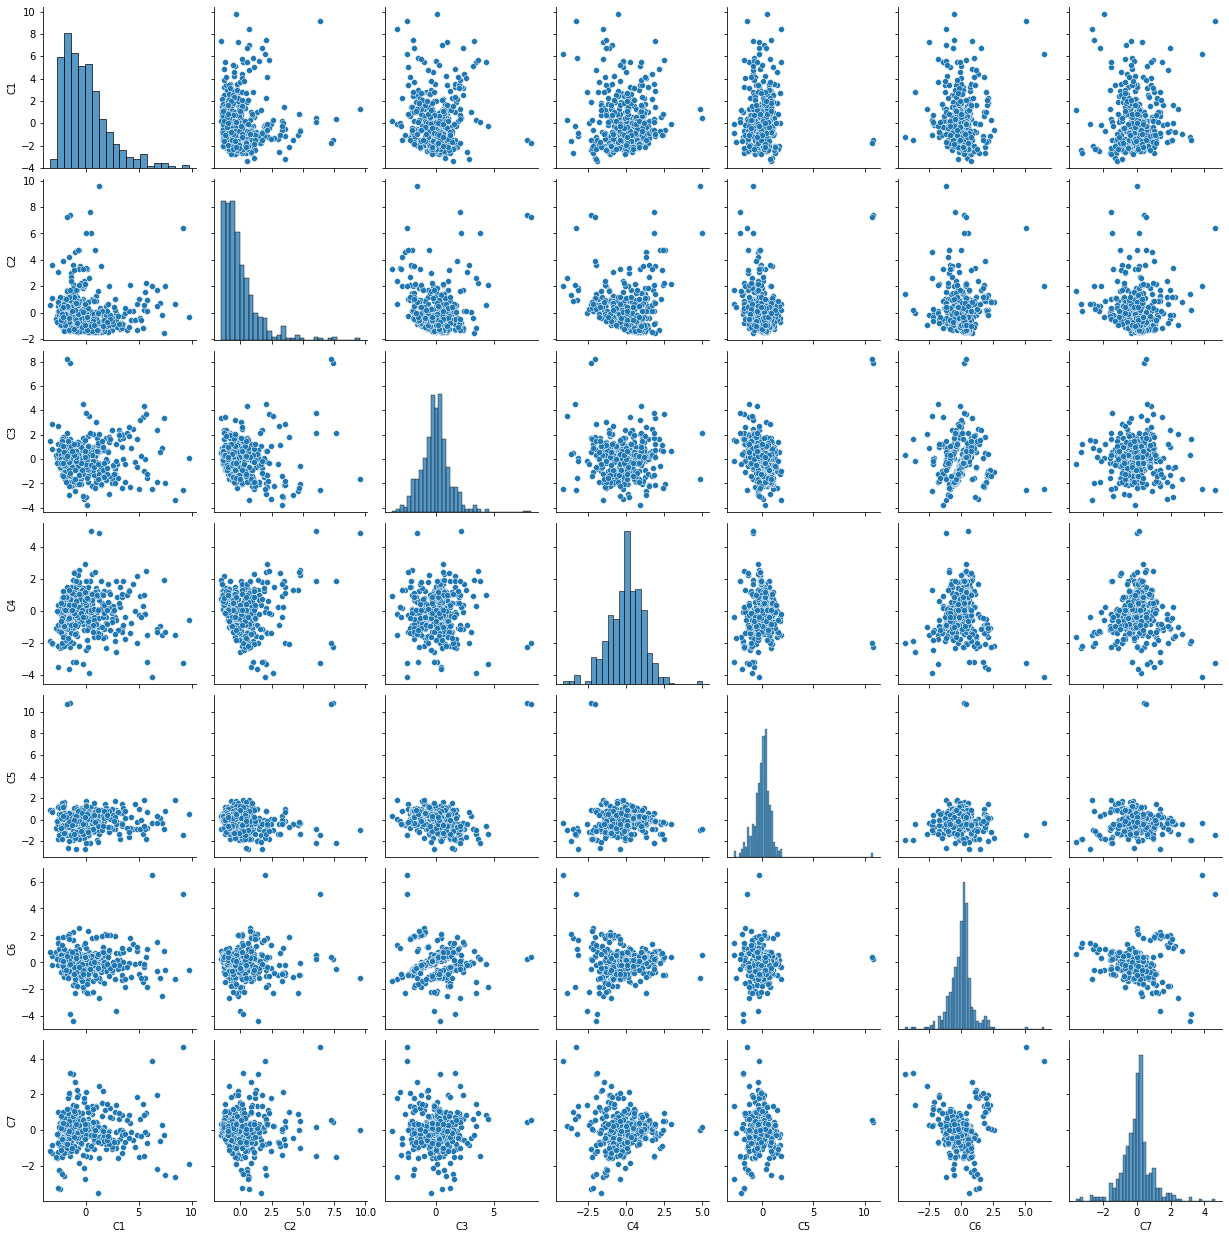

In [14]:
# do pairplots on the first 80% in pca space
data_pc = pd.DataFrame(pca.transform(data_scaled))
data_pc.columns = ['C'+str(i) for i in np.arange(1,pca.n_components_+1)]
sns.pairplot(data = data_pc, vars=['C1','C2','C3','C4','C5','C6','C7'])

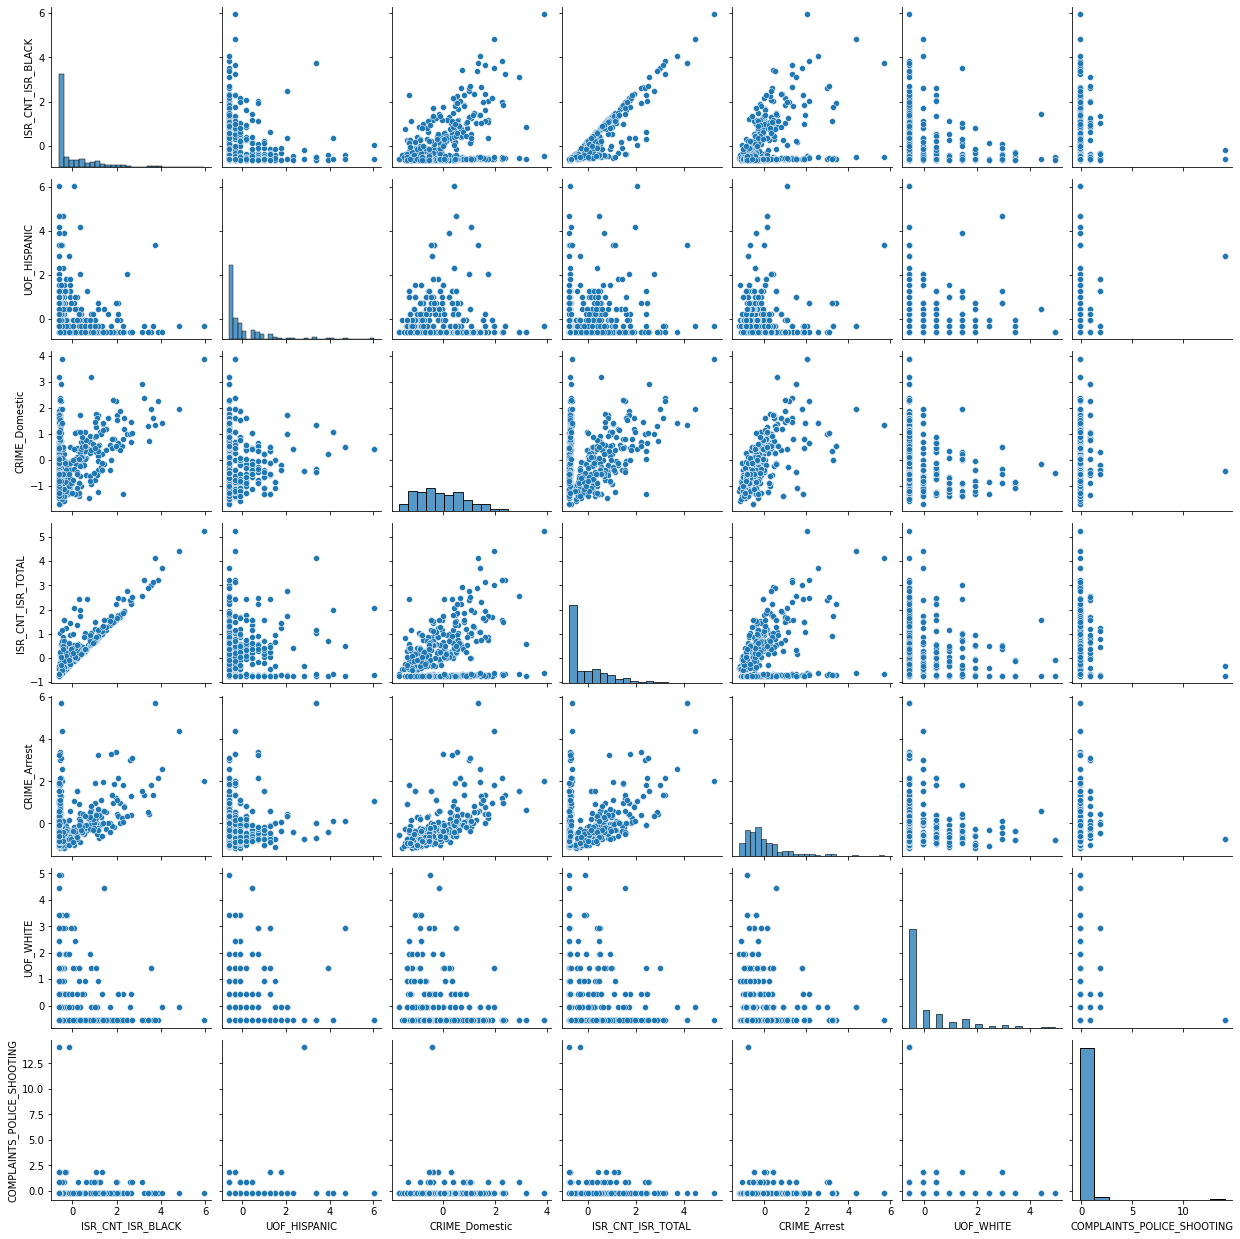

In [15]:
# do pairplots on random 80% in feature space
rand_cols = pd.Series(data.columns).sample(n=7)
sns.pairplot(data = data_scaled, vars=rand_cols)